In [149]:
#import agentpy as ap
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
#from tqdm import tqdm
from datetime import datetime
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from bokeh.io import output_notebook, show
from pprint import pprint
#import json, re, demjson
import sys
import random
import matplotlib.pyplot as plt

# 1er metodo generar power law in and out graph

In [71]:
graph = nx.scale_free_graph(2000)
graph=nx.DiGraph(G)
#G=nx.connected_components(G)#doesnt work for directed graphs

graph.remove_edges_from(nx.selfloop_edges(G))
#graoh=nx.connected_components(G)
#nx.draw(G,node_size=20)
#G.out_degree()

# 2º metodo de generar power law in and out graph

10452 10452


C:\Users\BrunoM\AppData\Local\Temp/ipykernel_3040/3384970354.py:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


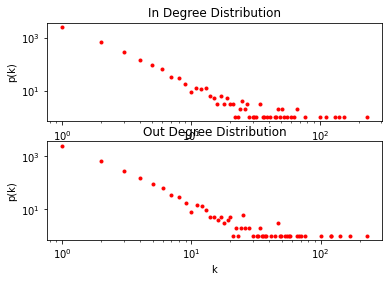

In [334]:
def plot_degree_dist(G):
    in_degrees = G.in_degree()
    in_degrees=dict(in_degrees)
    in_values = sorted(set(in_degrees.values()))
    in_hist = [list(in_degrees.values()).count(x) for x in in_values]

    plt.subplot(2,1,1) 
    plt.grid(False)
    plt.loglog(in_values, in_hist, 'r.') 
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('In Degree Distribution')

    out_degrees = G.out_degree()
    out_degrees=dict(out_degrees)
    out_values = sorted(set(out_degrees.values()))
    out_hist = [list(out_degrees.values()).count(x) for x in out_values]

    plt.subplot(2,1,2)
    plt.grid(False)
    plt.loglog(out_values, out_hist, 'r.') 
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Out Degree Distribution')
    plt.show()


while True:  
    s=[]
    while len(s)<4000:
        nextval = int(nx.utils.powerlaw_sequence(1, 2.5)[0]) #100 nodes, power-law exponent 2.5

        if nextval!=0:
            s.append(nextval)

    if sum(s)%2 == 0:
        break

din = s


#print(sum(din),sum(dout))
dout=random.sample(s,len(s))
#dout = z1

print(sum(din),sum(dout))

graph = nx.directed_configuration_model(din, dout)
graph=nx.DiGraph(graph) # remove parallel edges
graph.remove_edges_from(nx.selfloop_edges(graph))
plot_degree_dist(graph)


# Exponential graph

41250 41250


C:\Users\BrunoM\AppData\Local\Temp/ipykernel_3040/694282479.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


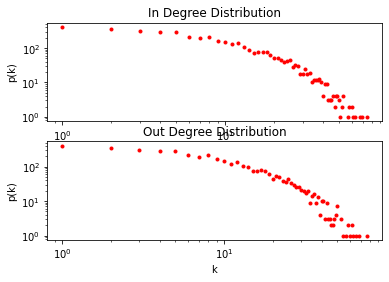

In [323]:
from scipy.stats import expon

#generate random values from exponential distribution with rate=40 and sample size=10
expon.rvs(scale=40, size=10)
def plot_degree_dist(G):
    in_degrees = G.in_degree()
    in_degrees=dict(in_degrees)
    in_values = sorted(set(in_degrees.values()))
    in_hist = [list(in_degrees.values()).count(x) for x in in_values]

    plt.subplot(2,1,1) 
    plt.grid(False)
    plt.loglog(in_values, in_hist, 'r.') 
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('In Degree Distribution')

    out_degrees = G.out_degree()
    out_degrees=dict(out_degrees)
    out_values = sorted(set(out_degrees.values()))
    out_hist = [list(out_degrees.values()).count(x) for x in out_values]

    plt.subplot(2,1,2)
    plt.grid(False)
    plt.loglog(out_values, out_hist, 'r.') 
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Out Degree Distribution')
    plt.show()


while True:  
    s=[]
    while len(s)<4000:
        nextval = int(expon.rvs(scale=10, size=1)) #generate random values from exponential distribution with rate=40 and sample size=10


        if nextval!=0:
            s.append(nextval)

    if sum(s)%2 == 0:
        break

din = s


#print(sum(din),sum(dout))
dout=random.sample(s,len(s))
#dout = z1

print(sum(din),sum(dout))

graph = nx.directed_configuration_model(din, dout)
graph=nx.DiGraph(graph) # remove parallel edges
graph.remove_edges_from(nx.selfloop_edges(graph))
plot_degree_dist(graph)


C:\Users\BrunoM\AppData\Local\Temp/ipykernel_3040/3519019974.py:55: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


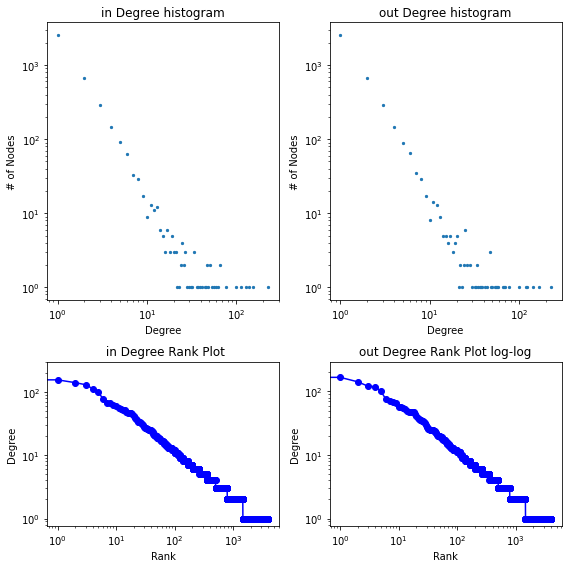

In [335]:
degree_sequence1 = sorted((d for n, d in graph.in_degree()), reverse=True)
dmax1 = max(degree_sequence1)
degree_sequence2 = sorted((d for n, d in graph.out_degree()), reverse=True)
dmax2 = max(degree_sequence2)

fig = plt.figure("Degree of a B-A graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 6)

"""ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()"""

ax1 = fig.add_subplot(axgrid[3:, :3])
ax1.plot(degree_sequence1, "b-", marker="o")
ax1.set_title(" in Degree Rank Plot")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")



ax3 = fig.add_subplot(axgrid[3:, 3:])
ax3.plot(degree_sequence2, "b-", marker="o")
ax3.set_title("out Degree Rank Plot log-log")
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel("Degree")
ax3.set_xlabel("Rank")




ax2 = fig.add_subplot(axgrid[0:3, :3])
ax2.scatter(*np.unique([i for i in degree_sequence1 if i != 0], return_counts=True), s=5)
ax2.set_title("in Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_xscale('log')
ax2.set_yscale('log')

ax4 = fig.add_subplot(axgrid[0:3,3:])
ax4.scatter(*np.unique([i for i in degree_sequence2 if i != 0], return_counts=True), s=5)
ax4.set_title("out Degree histogram")
ax4.set_xlabel("Degree")
ax4.set_ylabel("# of Nodes")
ax4.set_xscale('log')
ax4.set_yscale('log')
fig.tight_layout()
plt.show()

In [336]:
value=1

count=0
for i in range(len(degree_sequence2)):
    if degree_sequence2[i]==value:
        count+=1
print('nº nodes with out degree  '+str(value), count)

count1=0
for i in range(len(degree_sequence1)):
    if degree_sequence1[i]==value:
        count1+=1
print('nº nodes with in degree  '+str(value), count1)


nº nodes with out degree  1 2541
nº nodes with in degree  1 2542


In [337]:
print('No coincide el numero total de edges   ',graph.number_of_edges(),'con la suma de in and out degree edges  ',(sum(din)+sum(dout))/2)

No coincide el numero total de edges    10219 con la suma de in and out degree edges   10452.0


Independent Cascade starts by having an initial set of seed nodes,  A0 , that start the diffusion process, and the process unfolds in discrete steps according to the following randomized rule:

When node  v  first becomes active in step  t , it is given a single chance to activate each currently inactive neighbor  w ; this process succeeds with a probability  pv,w , a parameter of the system — independently of the history thus far. If  v  succeeds, then  w  will become active in step  t+1 ; but whether or not  v  succeeds in this current step  t , it cannot make any further attempts to activate  w  in subsequent rounds. This process runs until no more activations are possible. Here, we assume that the nodes are progressive, meaning the node will only go from inactive to active, but not the other way around.



In [338]:
def compute_independent_cascade(graph, prob, n_iters=1000):
    total_spead = 0
    seeds_offs=[]
    nodes_offs=[]
    # simulate the spread process over multiple runs
    for i in range(n_iters):
        seed_nodes = [np.random.choice(graph.nodes)]

        np.random.seed(i)
        active = seed_nodes[:]
        new_active = seed_nodes[:]
        
        # for each newly activated nodes, find its neighbors that becomes activated
        
        num=0#contador para separar las seeds offspring y node offspring
        while new_active:
            
            num=num+1
            
            activated_nodes = []
            
            for node in new_active:
                neighbors = list(graph.neighbors(node))
                success = np.random.uniform(0, 1, len(neighbors)) < prob
                activated_nodes += list(np.extract(success, neighbors))
                
                
            if num == 1:
                seeds_offs.append(len(activated_nodes))
            else:
                nodes_offs.append(len(activated_nodes))
            # ensure the newly activated nodes doesn't already exist
            # in the final list of activated nodes before adding them
            # to the final list
            new_active = list(set(activated_nodes) - set(active))
            active += new_active

        total_spead += len(active)
        #print(total_spead)
               
        
    fig = plt.figure("seed offspring and node offspring", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(2, 9)


    #n_bins1=len(seeds_offs)
    counts, bins = np.histogram(seeds_offs)
    #plt.hist(bins[:-1], bins, weights=counts)
    #print(n_bins1)
    ax0 = fig.add_subplot(axgrid[:1, :4])
    ax0.hist(bins[:-1], bins, weights=counts,density=True )
    ax0.set_title(" seeds_offs")
    #ax1.set_xscale('log')
    #ax1.set_yscale('log')
    ax0.set_ylabel("counts")
    ax0.set_xlabel("offspring")


    #n_bins2=len(nodes_offs)
    counts1, bins1 = np.histogram(nodes_offs)
    #plt.hist(bins[:-1], bins, weights=counts)

    ax1 = fig.add_subplot(axgrid[:1, 5:])
    ax1.hist(bins1[:-1], bins1, weights=counts1,density=True)
    ax1.set_title("nodes_offs")
    #ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax1.set_ylabel("counts")
    ax1.set_xlabel("offspring")
    #print(n_bins2)

        
        
        
        
        
    print('el numero maximo de offspring del seed es   ', max(seeds_offs)) 
    print('el numero maximo de offspring de los nodos es   ', max(nodes_offs))    
    return total_spead / n_iters, fig


"""# assuming we start with 1 seed node

seed_nodes = [np.random.choice(graph.nodes)]
                        
compute_independent_cascade(graph, seed_nodes, prob=0.5)"""

'# assuming we start with 1 seed node\n\nseed_nodes = [np.random.choice(graph.nodes)]\n                        \ncompute_independent_cascade(graph, seed_nodes, prob=0.5)'

el numero maximo de offspring del seed es    111
el numero maximo de offspring de los nodos es    440


(80.81, <Figure size 576x576 with 2 Axes>)

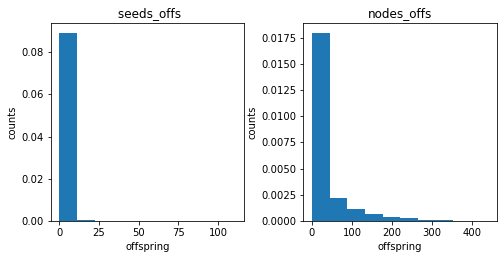

In [341]:
compute_independent_cascade(graph, prob=0.5)


In [340]:
max([graph.out_degree(i) for i in range(0,len(graph.out_degree()))])

226